In [1]:
%cd ..

e:\projects of camp


In [ ]:
"""
Data Loader and Explorer
========================
مسؤول عن تحميل البيانات والاستكشاف الأولي
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

# إعداد النص العربي في الرسوم البيانية
plt.rcParams['font.size'] = 20
sns.set_style("whitegrid")

class DataLoader:
    def __init__(self, data_path):
        """تهيئة محمل البيانات"""
        self.data_path = data_path
        self.df = None
        self.target_col = None
        
    def load_data(self):
        """تحميل البيانات من الملف"""
        print("📊 تحميل البيانات...")
        try:
            self.df = pd.read_csv(self.data_path)
            print(f"✅ تم تحميل البيانات بنجاح: {self.df.shape}")
            return self.df
        except Exception as e:
            print(f"❌ خطأ في تحميل البيانات: {e}")
            return None
    
    def get_basic_info(self):
        """الحصول على معلومات أساسية عن البيانات"""
        if self.df is None:
            print("❌ لم يتم تحميل البيانات بعد")
            return None
            
        print("\n🔍 معلومات أساسية عن البيانات:")
        print(f"الشكل: {self.df.shape}")
        print(f"الأعمدة: {list(self.df.columns)}")
        
        print("\n📋 أنواع البيانات:")
        print(self.df.dtypes)
        
        print("\n📈 الإحصائيات الوصفية:")
        print(self.df.describe())
        
        return {
            'shape': self.df.shape,
            'columns': list(self.df.columns),
            'dtypes': self.df.dtypes,
            'description': self.df.describe()
        }
    # فحص القيم المفقودة في البيانات ان وجدت وهذا فقط ولكن ليست معالجة 
    def check_missing_data(self):
       
        if self.df is None:
            return None
            
        print("\n🧹 فحص القيم المفقودة:")
        missing_data = self.df.isnull().sum()
        missing_percent = (missing_data / len(self.df)) * 100
        
        missing_df = pd.DataFrame({
            'Column': missing_data.index,
            'Missing_Count': missing_data.values,
            'Missing_Percent': missing_percent.values
        })
        
        missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
        
        if len(missing_df) > 0:
            print(missing_df)
            
            # رسم القيم المفقودة
            if len(missing_df) > 0:
                plt.figure(figsize=(10, 6))
                plt.bar(missing_df['Column'], missing_df['Missing_Percent'])
                plt.title('نسبة القيم المفقودة لكل عمود')
                plt.xlabel('الأعمدة')
                plt.ylabel('نسبة القيم المفقودة (%)')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
        else:
            print("✅ لا توجد قيم مفقودة")
            
        return missing_df
    # تحديد المتغير التابع المحتمل في البيانات  يوجد طرق كثيرة وبسيطة ولكن هذه الدالة تطبق مع معظم الييانات 
    def identify_target_column(self):
       
        if self.df is None:
            return None
            
        # البحث عن المتغير التابع المحتمل
        #يفضل معرفة اسم العمود الذي يمثل المتغير التابع في البيانات يدويا 
        # ولكن هنا نبحث عن أعمدة شائعة الاستخدام
        target_candidates = ['failure', 'Machine failure', 'target', 'label', 'class','fail']
        # بمراجعة الداتا يغعتبر fail هو المتغير التابع 
        for col in target_candidates:
            if col in self.df.columns:
                self.target_col = col
                break
        
        # إذا لم يتم العثور على المتغير التابع، البحث عن عمود بقيمتين فقط
        #ولكن هنا نبحث عن الأعمدة التي تحتوي على قيمتين فقط ولكن هذه طريقة لا تصلح في كل الحالات
        if not self.target_col:
            for col in self.df.columns:
                if self.df[col].nunique() == 2:
                    self.target_col = col
                    break
        
        if self.target_col:
            print(f"\n🎯 تم تحديد المتغير التابع: {self.target_col}")
            print("توزيع القيم:")
            value_counts = self.df[self.target_col].value_counts()
            print(value_counts)
            
            # حساب نسبة الأعطال
            if self.df[self.target_col].dtype in ['int64', 'float64']:
                failure_rate = self.df[self.target_col].mean()
                print(f"نسبة الأعطال: {failure_rate:.2%}")
            
            return self.target_col
        else:
            print("⚠️ لم يتم العثور على المتغير التابع")
            return None
    
    def show_sample_data(self, n=5):
        """عرض عينة من البيانات"""
        if self.df is None:
            return None
            
        print(f"\n🔎 أول {n} صفوف:")
        print(self.df.head(n))
        
        print(f"\n🔎 آخر {n} صفوف:")
        print(self.df.tail(n))
        
        return self.df.head(n), self.df.tail(n)
    
    def get_column_info(self):
        """معلومات تفصيلية عن الأعمدة"""
        if self.df is None:
            return None
            
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = self.df.select_dtypes(include=['object']).columns.tolist()
        
        print(f"\n📊 الأعمدة الرقمية ({len(numeric_cols)}):")
        for col in numeric_cols:
            print(f"  - {col}: {self.df[col].dtype}")
            
        print(f"\n🏷️ الأعمدة الفئوية ({len(categorical_cols)}):")
        for col in categorical_cols:
            unique_count = self.df[col].nunique()
            print(f"  - {col}: {unique_count} قيمة فريدة")
            
        return {
            'numeric_columns': numeric_cols,
            'categorical_columns': categorical_cols
        }
    
    def run_complete_exploration(self):
        """تشغيل الاستكشاف الكامل للبيانات"""
        print("🚀 بدء الاستكشاف الكامل للبيانات")
        print("="*50)
        
        # تحميل البيانات
        if self.load_data() is None:
            return None
        
        # المعلومات الأساسية
        basic_info = self.get_basic_info()
        
        # فحص القيم المفقودة
        missing_info = self.check_missing_data()
        
        # تحديد المتغير التابع
        target_col = self.identify_target_column()
        
        # عرض عينة من البيانات
        sample_data = self.show_sample_data()
        
        # معلومات الأعمدة
        column_info = self.get_column_info()
        
        print("\n✅ تم الانتهاء من استكشاف البيانات")
        
        return {
            'dataframe': self.df,
            'target_column': self.target_col,
            'basic_info': basic_info,
            'missing_info': missing_info,
            'column_info': column_info
        }

# مثال على الاستخدام
if __name__ == "__main__":
    # استخدام الكلاس
    loader = DataLoader(r"E:\projects of camp\Machine Failure Prediction\data\data.csv")# مسار البيانات
    results = loader.run_complete_exploration()
    
    # الوصول للبيانات
    if results:
        df = results['dataframe']
        target_col = results['target_column']
        print(f"البيانات جاهزة: {df.shape}")
        print(f"المتغير التابع: {target_col}")

🚀 بدء الاستكشاف الكامل للبيانات
📊 تحميل البيانات...
✅ تم تحميل البيانات بنجاح: (944, 10)

🔍 معلومات أساسية عن البيانات:
الشكل: (944, 10)
الأعمدة: ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']

📋 أنواع البيانات:
footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

📈 الإحصائيات الوصفية:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.

🎨 بدء التصور الكامل للبيانات
📋 رسم ملخص جودة البيانات...


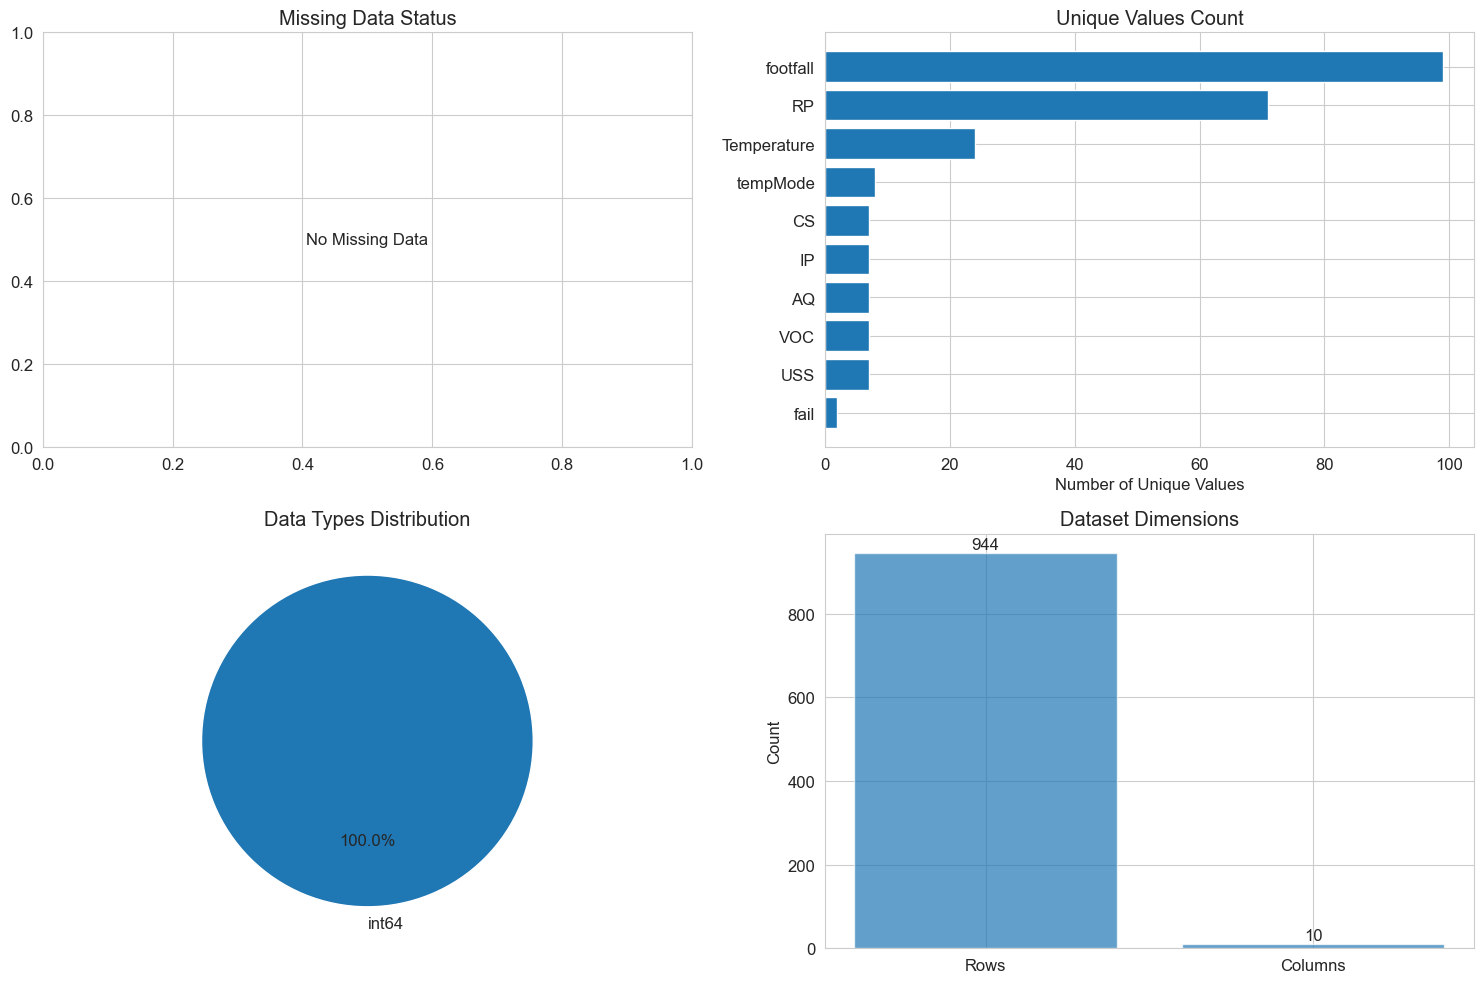

📊 رسم توزيع المتغيرات...


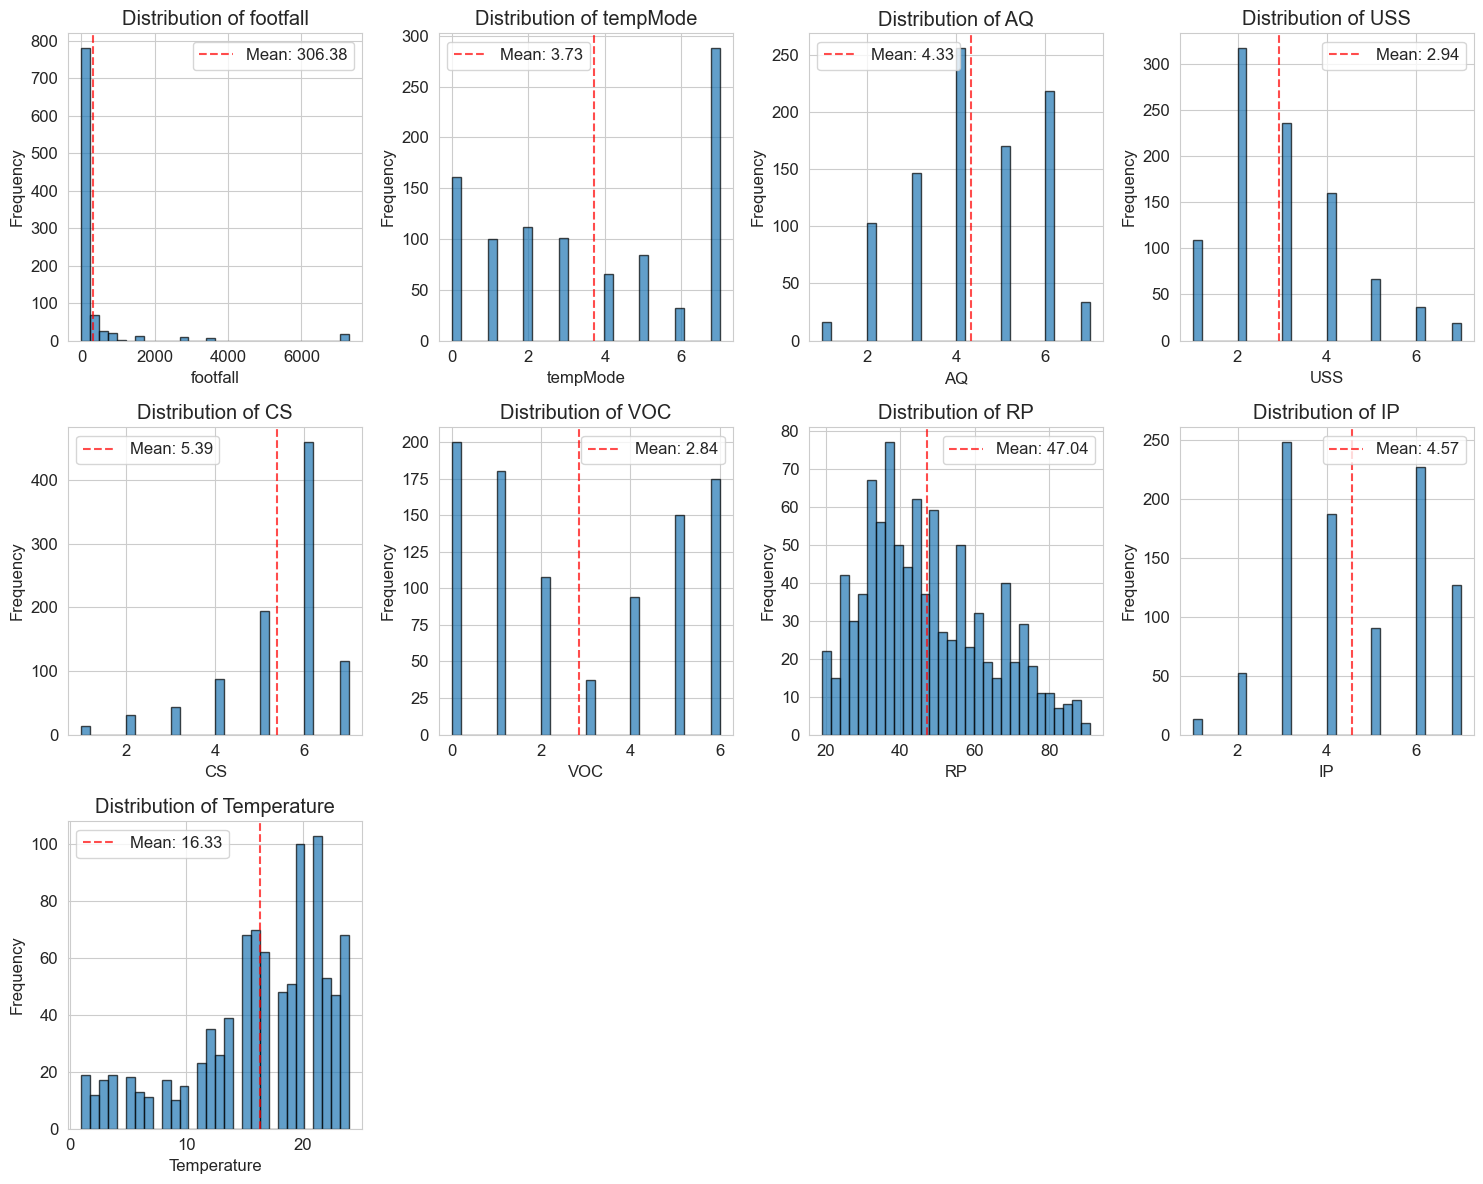

🔗 رسم مصفوفة الارتباط (pearson)...


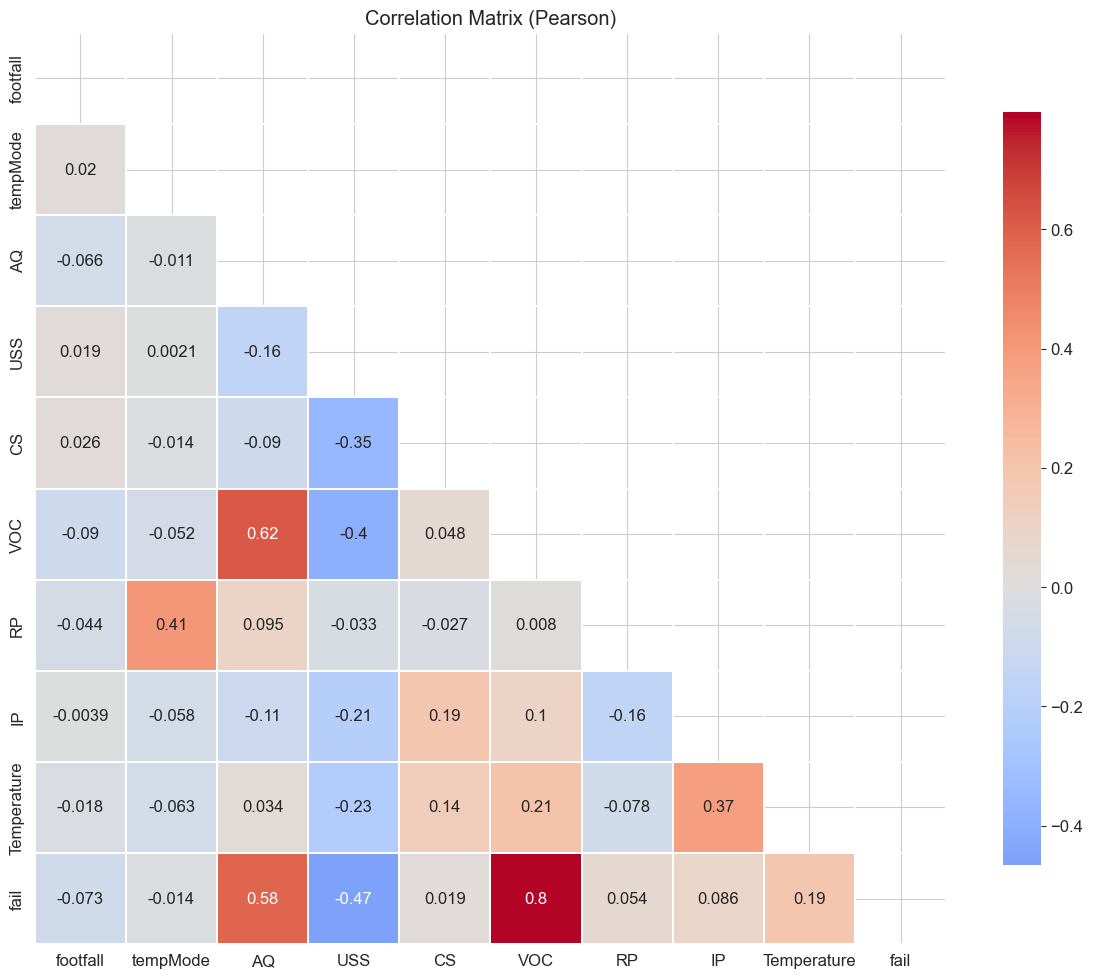

🎯 رسم توزيع المتغير التابع...


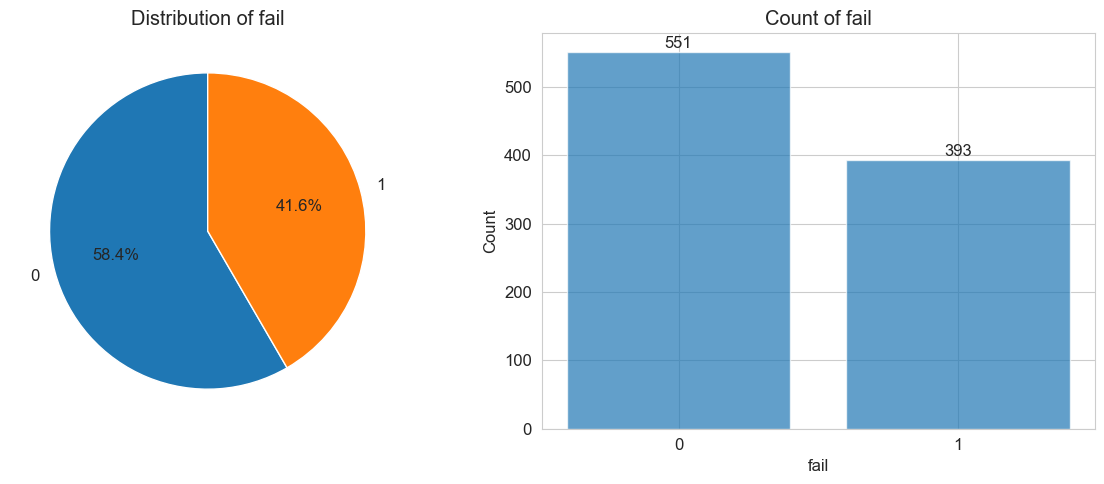

📈 رسم العلاقة بين الخصائص والمتغير التابع...


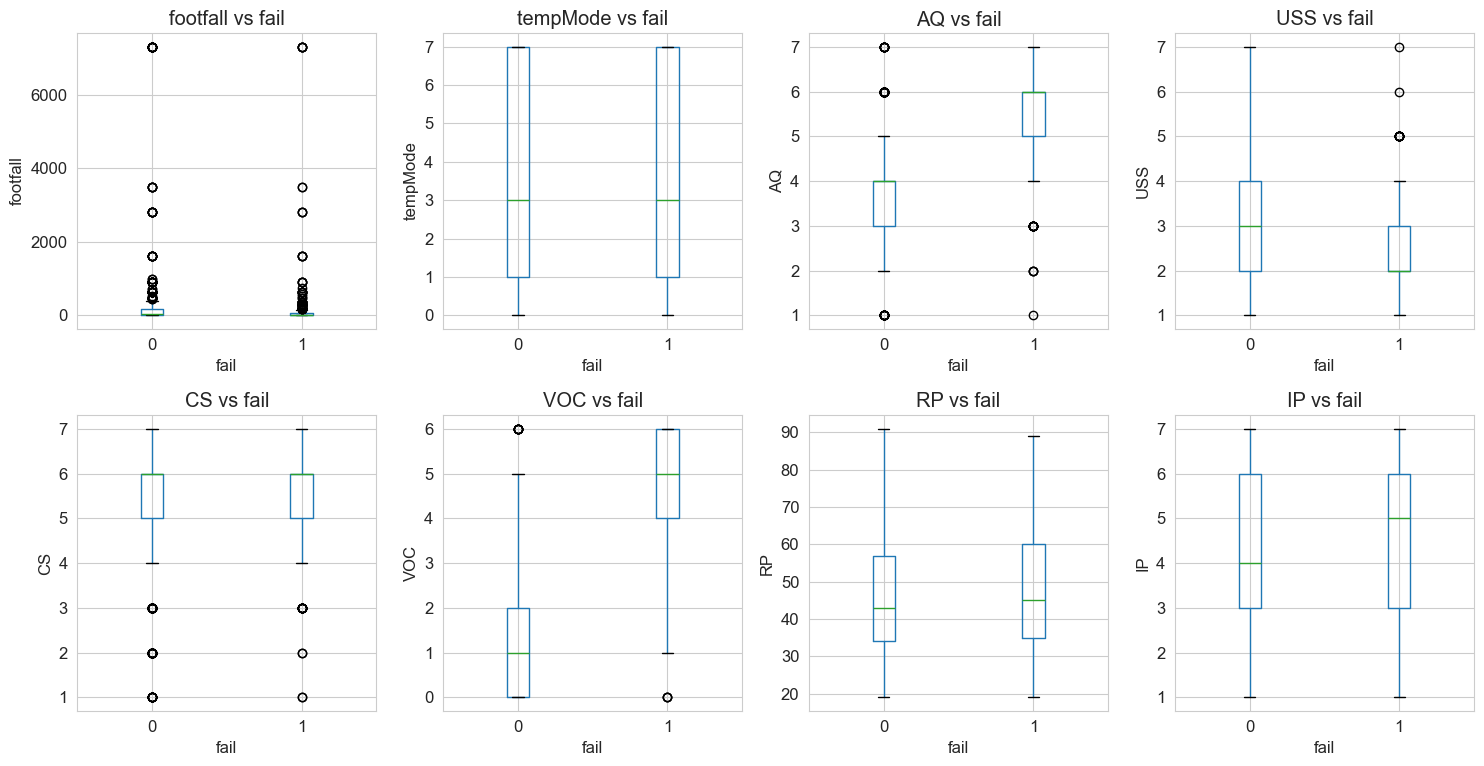

🚨 رسم كشف الشذوذ...


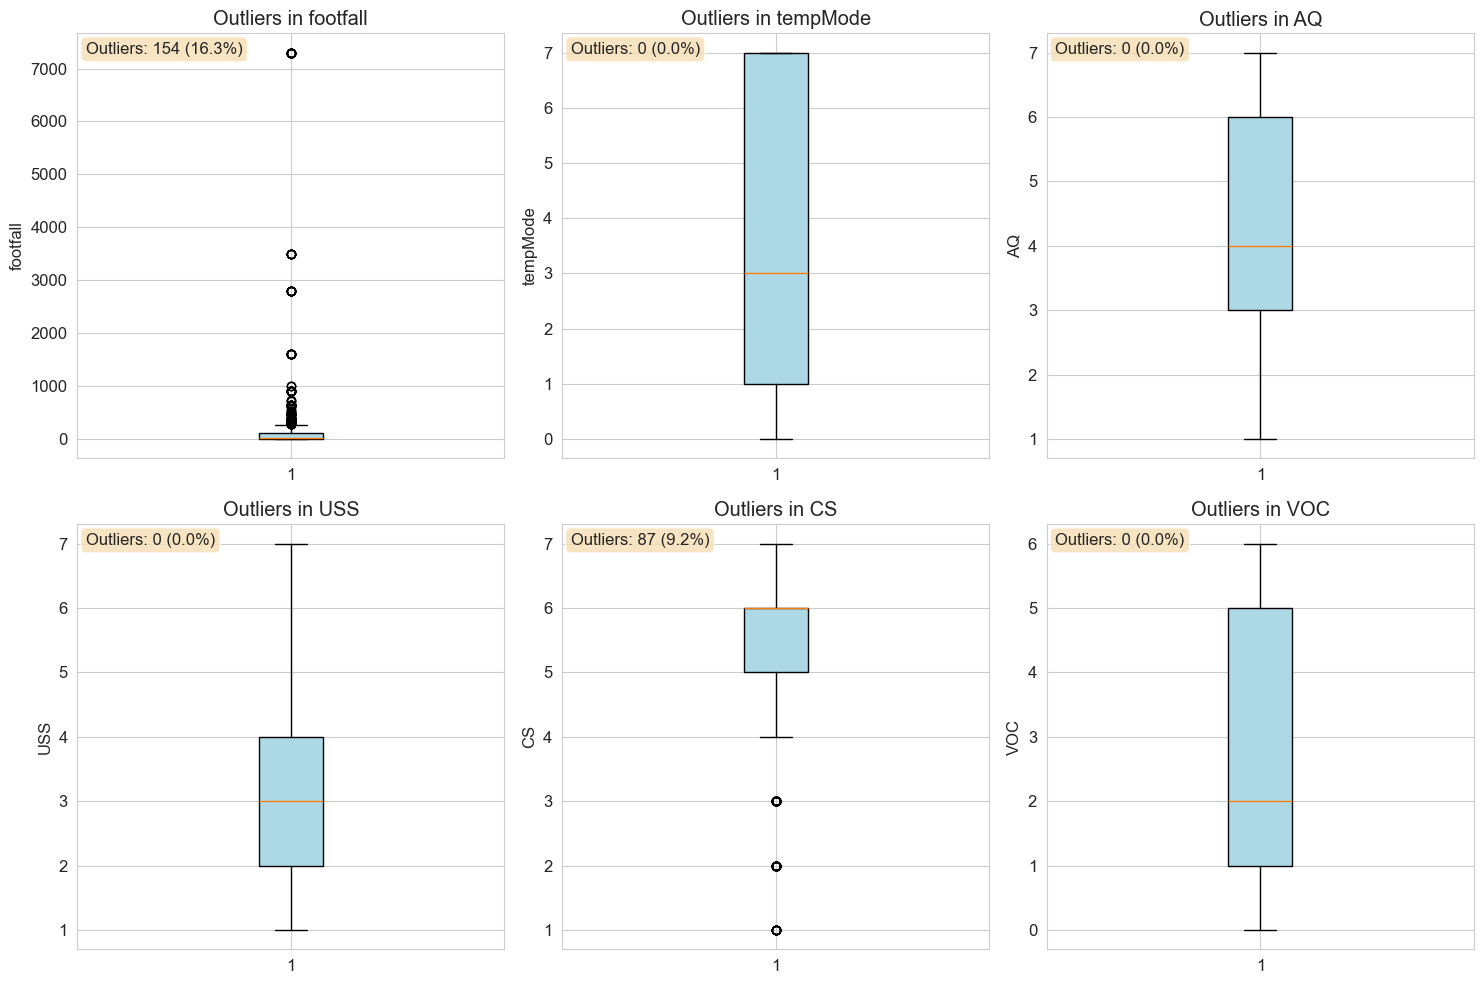

📊 إنتاج الملخص الإحصائي...
             count      mean        std   min     max  skewness  kurtosis  \
footfall     944.0  306.3814  1082.6067   0.0  7300.0    5.4811   31.1710   
tempMode     944.0    3.7278     2.6772   0.0     7.0   -0.0191   -1.5175   
AQ           944.0    4.3252     1.4384   1.0     7.0   -0.1808   -0.7897   
USS          944.0    2.9396     1.3837   1.0     7.0    0.8099    0.3364   
CS           944.0    5.3941     1.2693   1.0     7.0   -1.3353    1.7159   
VOC          944.0    2.8422     2.2733   0.0     6.0    0.1248   -1.5691   
RP           944.0   47.0434    16.4231  19.0    91.0    0.5243   -0.5504   
IP           944.0    4.5657     1.5993   1.0     7.0    0.0145   -1.1683   
Temperature  944.0   16.3316     5.9748   1.0    24.0   -0.9144    0.0688   

              q25   q50    q75    iqr  
footfall      1.0  22.0  110.0  109.0  
tempMode      1.0   3.0    7.0    6.0  
AQ            3.0   4.0    6.0    3.0  
USS           2.0   3.0    4.0    2.0  
CS

In [20]:
"""
Data Visualizer
===============
مسؤول عن رسم وتصور البيانات
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class DataVisualizer:
    def __init__(self, df, target_col=None):
        """تهيئة مصور البيانات"""
        self.df = df
        self.target_col = target_col
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
        # إزالة المتغير التابع من الأعمدة الرقمية إذا وجد
        if target_col and target_col in self.numeric_cols:
            self.numeric_cols.remove(target_col)
    
    def plot_distributions(self, max_cols=12):
        """رسم توزيع المتغيرات الرقمية"""
        print("📊 رسم توزيع المتغيرات...")
        
        cols_to_plot = self.numeric_cols[:max_cols]
        n_cols = min(4, len(cols_to_plot))
        n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(cols_to_plot):
            ax = axes[i] if n_rows > 1 or n_cols > 1 else axes
            
            # رسم الهيستوجرام
            self.df[col].hist(bins=30, alpha=0.7, ax=ax, edgecolor='black')
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            
            # إضافة خط المتوسط
            mean_val = self.df[col].mean()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
            ax.legend()
        
        # إخفاء المحاور الإضافية
        for i in range(len(cols_to_plot), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def plot_correlation_matrix(self, method='pearson'):
        """رسم مصفوفة الارتباط"""
        print(f"🔗 رسم مصفوفة الارتباط ({method})...")
        
        if len(self.numeric_cols) < 2:
            print("⚠️ لا توجد أعمدة رقمية كافية لرسم مصفوفة الارتباط")
            return None
        
        # حساب الارتباط
        corr_data = self.df[self.numeric_cols + ([self.target_col] if self.target_col else [])]
        corr_matrix = corr_data.corr(method=method)
        
        # رسم المصفوفة
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # إخفاء الجزء العلوي
        
        sns.heatmap(corr_matrix, 
                   mask=mask,
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   square=True, 
                   linewidths=0.1,
                   cbar_kws={"shrink": .8})
        
        plt.title(f'Correlation Matrix ({method.title()})')
        plt.tight_layout()
        plt.show()
        
        return corr_matrix
    
    def plot_target_distribution(self):
        """رسم توزيع المتغير التابع"""
        if not self.target_col:
            print("⚠️ لم يتم تحديد المتغير التابع")
            return
        
        print("🎯 رسم توزيع المتغير التابع...")
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # الرسم البياني الدائري
        value_counts = self.df[self.target_col].value_counts()
        axes[0].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[0].set_title(f'Distribution of {self.target_col}')
        
        # الرسم البياني العمودي
        axes[1].bar(value_counts.index.astype(str), value_counts.values, alpha=0.7)
        axes[1].set_title(f'Count of {self.target_col}')
        axes[1].set_xlabel(self.target_col)
        axes[1].set_ylabel('Count')
        
        # إضافة القيم فوق الأعمدة
        for i, v in enumerate(value_counts.values):
            axes[1].text(i, v + max(value_counts.values) * 0.01, str(v), ha='center')
        
        plt.tight_layout()
        plt.show()
    
    def plot_features_vs_target(self, max_features=8):
        """رسم العلاقة بين الخصائص والمتغير التابع"""
        if not self.target_col:
            print("⚠️ لم يتم تحديد المتغير التابع")
            return
        
        print("📈 رسم العلاقة بين الخصائص والمتغير التابع...")
        
        features_to_plot = self.numeric_cols[:max_features]
        n_cols = min(4, len(features_to_plot))
        n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(features_to_plot):
            ax = axes[i] if n_rows > 1 or n_cols > 1 else axes
            
            # Box plot للمقارنة بين الفئات
            self.df.boxplot(column=col, by=self.target_col, ax=ax)
            ax.set_title(f'{col} vs {self.target_col}')
            ax.set_xlabel(self.target_col)
            ax.set_ylabel(col)
        
        # إخفاء المحاور الإضافية
        for i in range(len(features_to_plot), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle('')  # إزالة العنوان الافتراضي
        plt.tight_layout()
        plt.show()
    
    def plot_outliers_detection(self, max_features=6):
        """رسم كشف الشذوذ"""
        print("🚨 رسم كشف الشذوذ...")
        
        features_to_plot = self.numeric_cols[:max_features]
        n_cols = 3
        n_rows = (len(features_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if n_cols == 1 else axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(features_to_plot):
            ax = axes[i] if n_rows > 1 or n_cols > 1 else axes
            
            # Box plot لكشف الشذوذ
            box_plot = ax.boxplot(self.df[col].dropna(), patch_artist=True)
            box_plot['boxes'][0].set_facecolor('lightblue')
            ax.set_title(f'Outliers in {col}')
            ax.set_ylabel(col)
            
            # إضافة معلومات إحصائية
            q1 = self.df[col].quantile(0.25)
            q3 = self.df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)][col]
            ax.text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(self.df)*100:.1f}%)', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # إخفاء المحاور الإضافية
        for i in range(len(features_to_plot), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def plot_data_quality_summary(self):
        """رسم ملخص جودة البيانات"""
        print("📋 رسم ملخص جودة البيانات...")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # 1. نسبة القيم المفقودة
        missing_data = self.df.isnull().sum()
        missing_percent = (missing_data / len(self.df)) * 100
        missing_df = pd.DataFrame({
            'Column': missing_data.index,
            'Missing_Percent': missing_percent.values
        })
        missing_df = missing_df[missing_df['Missing_Percent'] > 0].sort_values('Missing_Percent', ascending=True)
        
        if len(missing_df) > 0:
            axes[0,0].barh(missing_df['Column'], missing_df['Missing_Percent'])
            axes[0,0].set_title('Missing Data Percentage')
            axes[0,0].set_xlabel('Missing Percentage (%)')
        else:
            axes[0,0].text(0.5, 0.5, 'No Missing Data', ha='center', va='center', transform=axes[0,0].transAxes)
            axes[0,0].set_title('Missing Data Status')
        
        # 2. عدد القيم الفريدة لكل عمود
        unique_counts = self.df.nunique().sort_values(ascending=True)
        axes[0,1].barh(range(len(unique_counts)), unique_counts.values)
        axes[0,1].set_yticks(range(len(unique_counts)))
        axes[0,1].set_yticklabels(unique_counts.index)
        axes[0,1].set_title('Unique Values Count')
        axes[0,1].set_xlabel('Number of Unique Values')
        
        # 3. نوع البيانات
        dtype_counts = self.df.dtypes.value_counts()
        axes[1,0].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
        axes[1,0].set_title('Data Types Distribution')
        
        # 4. حجم البيانات
        axes[1,1].bar(['Rows', 'Columns'], [self.df.shape[0], self.df.shape[1]], alpha=0.7)
        axes[1,1].set_title('Dataset Dimensions')
        axes[1,1].set_ylabel('Count')
        
        # إضافة القيم فوق الأعمدة
        for i, v in enumerate([self.df.shape[0], self.df.shape[1]]):
            axes[1,1].text(i, v + max(self.df.shape) * 0.01, str(v), ha='center')
        
        plt.tight_layout()
        plt.show()
    
    def generate_statistical_summary(self):
        """إنتاج ملخص إحصائي شامل"""
        print("📊 إنتاج الملخص الإحصائي...")
        
        summary = {}
        
        for col in self.numeric_cols:
            col_data = self.df[col].dropna()
            
            summary[col] = {
                'count': len(col_data),
                'mean': col_data.mean(),
                'std': col_data.std(),
                'min': col_data.min(),
                'max': col_data.max(),
                'skewness': stats.skew(col_data),
                'kurtosis': stats.kurtosis(col_data),
                'q25': col_data.quantile(0.25),
                'q50': col_data.quantile(0.50),
                'q75': col_data.quantile(0.75),
                'iqr': col_data.quantile(0.75) - col_data.quantile(0.25)
            }
        
        # تحويل إلى DataFrame
        summary_df = pd.DataFrame(summary).T
        print(summary_df.round(4))
        
        return summary_df
    
    def run_complete_visualization(self):
        """تشغيل التصور الكامل للبيانات"""
        print("🎨 بدء التصور الكامل للبيانات")
        print("="*50)
        
        # ملخص جودة البيانات
        self.plot_data_quality_summary()
        
        # توزيع المتغيرات
        self.plot_distributions()
        
        # مصفوفة الارتباط
        corr_matrix = self.plot_correlation_matrix()
        
        # توزيع المتغير التابع
        self.plot_target_distribution()
        
        # العلاقة بين الخصائص والمتغير التابع
        self.plot_features_vs_target()
        
        # كشف الشذوذ
        self.plot_outliers_detection()
        
        # الملخص الإحصائي
        statistical_summary = self.generate_statistical_summary()
        
        print("\n✅ تم الانتهاء من التصور الكامل")
        
        return {
            'correlation_matrix': corr_matrix,
            'statistical_summary': statistical_summary
        }

# مثال على الاستخدام
if __name__ == "__main__":
    # تحميل البيانات (يفترض أن البيانات محملة مسبقاً)
    df = pd.read_csv(r"E:\projects of camp\Machine Failure Prediction\data\data.csv")
    target_col = "fail"
    
    # استخدام الكلاس
    visualizer = DataVisualizer(df, target_col)
    results = visualizer.run_complete_visualization()
    
    print("استخدم الكلاس DataVisualizer مع بيانات pandas DataFrame")